In [1]:
from scipy.stats import wilcoxon
import pickle
import numpy as np
import matplotlib.pyplot as plt
def save_obj(obj, name ):
    with open('./'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
t1 = load_obj('final_model_refactor.pkl')

In [3]:
list_keys = list(t1.keys())

In [4]:
t1_pred = np.empty((0,76))
GT = np.empty((0,76))
for i in list_keys:
    t1_pred = np.vstack((t1_pred, t1[i]['pred']))
    GT = np.vstack((GT, t1[i]['GT']))

In [5]:
d_MAE = (np.abs(GT - t1_pred)).mean(axis=-1)
print ('MAE: {:.4f}, std: {:.4f}'.format(np.round(d_MAE.mean(),2), np.round(d_MAE.std(),2)))

d_RMSE = np.sqrt(((GT - t1_pred)**2).mean(axis=-1))
print ('RMSE: {:.4f}, std: {:.4f}'.format(np.round(d_RMSE.mean(),2), np.round(d_RMSE.std(),2)))

MAE: 3.3100, std: 1.3600
RMSE: 4.5700, std: 1.7600


In [6]:
x1 = np.abs(GT - t1_pred).mean(axis=0)

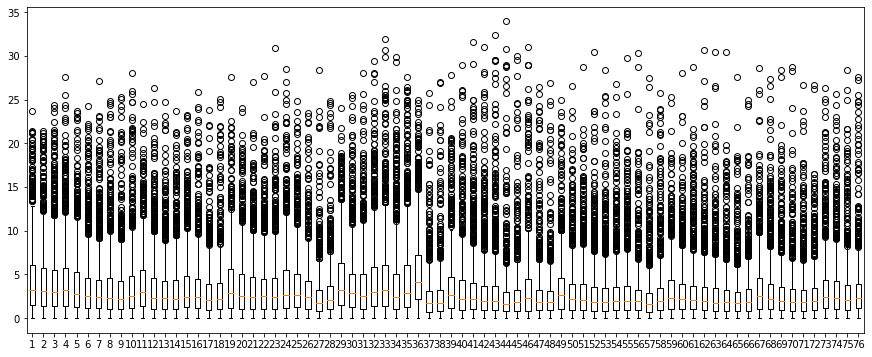

In [7]:
plt.figure(figsize=(15,6))
plt.boxplot(np.abs(GT - t1_pred))
plt.show()

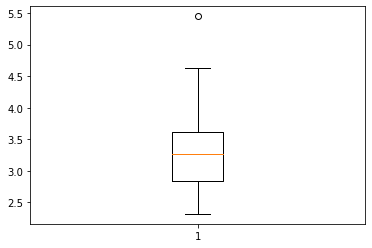

In [8]:
plt.boxplot(np.abs(GT - t1_pred).mean(axis=0))
plt.show()

In [9]:
def show(img, size = 8):
    plt.figure(figsize=(size,size))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()
    
def show_VF(data, font_size = 4, size=10):
    count = 0
    VF_map = np.zeros((10,10))
    fig = plt.figure(figsize=(size,size))
    ax = fig.add_subplot(111)
    for i in range(0,10):
        if i < 5:
            k = 3-i
        else:
            k = i-6
        if k < 0:
            k = 0
        for j in range(k,10-k):
            VF_map[i,j] = data[count]
            ax.annotate("{:.2f}".format(data[count]),xy=(j-0.3,i), fontsize=font_size)   
            count += 1                 
    plt.imshow(VF_map)
    plt.show()
    return None

def show_VF_paired(data_GT, data_pred, font_size = 4, size=15):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(size,size))
    show_VF_single(data_GT, ax[0], font_size = font_size)
    ax[0].set_title("Ground truth")
    show_VF_single(data_pred, ax[1], font_size = font_size)
    ax[1].set_title("Prediction")

    plt.show()
    return None

def show_VF_single(data, ax, font_size = 4, size=10, decimal = 1):
    count = 0
    VF_map = np.zeros((10,10))
    VF_map -= 1
    for i in range(0,10):
        if i < 5:
            k = 3-i
        else:
            k = i-6
        if k < 0:
            k = 0
        for j in range(k,10-k):
            VF_map[i,j] = data[count]
            if data[count] < 20:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i), fontsize=font_size, color='whitesmoke', ha='center')
            else:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i), fontsize=font_size, color='black', ha='center') 
            count += 1
    ax.imshow(VF_map, vmin=-1, vmax=40, cmap='viridis')
    return None

def show_VF_single_autocolor(data, ax, vmin = -1, vmax = 40, font_size = 4, size=10, decimal = 1):
    count = 0
    VF_map = np.zeros((10,10))
    VF_map -= 1
    for i in range(0,10):
        if i < 5:
            k = 3-i
        else:
            k = i-6
        if k < 0:
            k = 0
        for j in range(k,10-k):
            VF_map[i,j] = data[count]
            if data[count] < (vmin + vmax)/2:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i), fontsize=font_size, color='whitesmoke', ha='center')
            else:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i), fontsize=font_size, color='black', ha='center') 
            count += 1
    ax.imshow(VF_map, vmin=vmin, vmax=vmax, cmap='viridis')
    return None


def show_VF_single_autocolor_std(data, data2, ax, vmin = -1, vmax = 40, font_size = 4, size=10, decimal = 1):
    count = 0
    VF_map = np.zeros((10,10))
#     VF_map  = vmin
    for i in range(0,10):
        if i < 5:
            k = 3-i
        else:
            k = i-6
        if k < 0:
            k = 0
        for j in range(k,10-k):
            VF_map[i,j] = data[count]
            if data[count] < 3.5:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i-0.1), fontsize=font_size, color='black', ha='center')
                ax.annotate(("({:." + str(decimal) + "f})").format(data2[count]),xy=(j,i+0.3), fontsize=font_size, color='black', ha='center')
            else:
                ax.annotate(("{:." + str(decimal) + "f}").format(data[count]),xy=(j,i-0.1), fontsize=font_size, color='whitesmoke', ha='center')
                ax.annotate(("({:." + str(decimal) + "f})").format(data2[count]),xy=(j,i+0.3), fontsize=font_size, color='whitesmoke', ha='center')
            count += 1
    ax.imshow(VF_map, vmin=vmin, vmax=vmax, cmap='Blues')
    return None

def show_VF_list(data, list_title = None, font_size = 4, size=15):    
    fig, ax = plt.subplots(nrows=1, ncols=len(data), figsize=(size,5))
    for i in range(len(data)):
        show_VF_single(data[i], ax[i], font_size = font_size, decimal = 0)
        if list_title is not None:
            ax[i].set_title(list_title[i])
    return fig

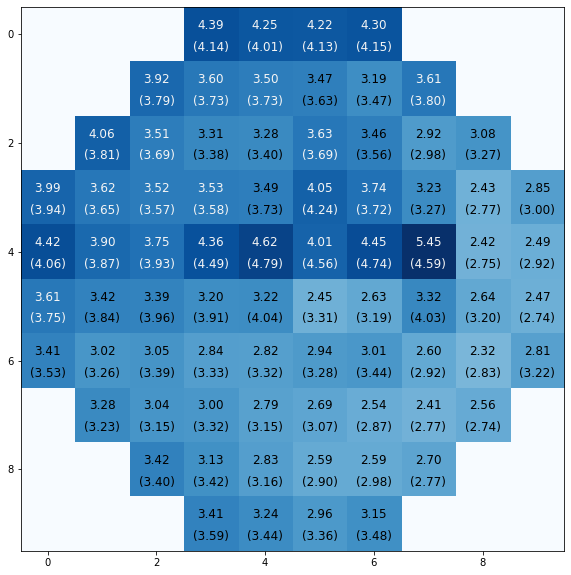

In [10]:
size = 10
fig = plt.figure(figsize=(size,size))
ax = fig.add_subplot(111)
show_VF_single_autocolor_std(np.abs(GT - t1_pred).mean(axis=0), np.abs(GT - t1_pred).std(axis=0), ax, vmin = 0, vmax = 5, font_size = 12, decimal = 2)
fig.savefig('MAE.png')